In [275]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [276]:
# Initialize an empty DataFrame
df_fasta_file = pd.DataFrame(columns=["Identifier", "Gene Name", "Description", "Protein Name", "Length", "Sequence"])

# Read in the fasta file
fasta_file = "uniprotkb_Bacillus_clausi.fasta"

# Read in the fasta file and store the data in the dataframe
def fastaToDataframe(fasta_file_path, df) -> None:
    for record in SeqIO.parse(fasta_file_path, "fasta"):
        identifier = record.id
        description = record.description
        if "GN=" not in description:
            gene_name = "N/A"
            protein_name = description.split(" ")[0]
        else:
            gene_name = description.split("GN=")[1].split(" ")[0]  # Define gene_name after description
        protein_name = description.split(" ")[1]
        length = len(record.seq)
        sequence = str(record.seq)
        
        # Append the row to the dataframe
        df.loc[len(df)] = [identifier, gene_name, description, protein_name, length, sequence]

fastaToDataframe(fasta_file, df_fasta_file)

df_fasta_file


,Identifier,Gene Name,Description,Protein Name,Length,Sequence
0,sp|Q99405|PRTM_SHOC1,aprE,sp|Q99405|PRTM_SHOC1 M-protease OS=Shouchella ...,M-protease,380,MKKPLGKIVASTALLISVAFSSSIASAAEEAKEKYLIGFNEQEAVS...
1,sp|Q5WAD9|GLMU_SHOC1,glmU,sp|Q5WAD9|GLMU_SHOC1 Bifunctional protein GlmU...,Bifunctional,454,MSGRFAVILAAGQGTRMKSKLYKVLHPVCGKPMVEHVVDQVSKLEF...
2,sp|Q5WB43|PYRG_SHOC1,pyrG,sp|Q5WB43|PYRG_SHOC1 CTP synthase OS=Shouchell...,CTP,534,MAAKYIFVTGGVVSSLGKGITAASLGRLLKNRGLKVTIQKFDPYIN...
3,sp|Q5WH08|RIBBA_SHOC1,ribBA,sp|Q5WH08|RIBBA_SHOC1 Riboflavin biosynthesis ...,Riboflavin,397,MFESIDEAITQLKAGGMILVVDDEDRENEGDFLALAETASPETINF...
4,sp|Q5WKB5|KYNU_SHOC1,kynU,sp|Q5WKB5|KYNU_SHOC1 Kynureninase OS=Shouchell...,Kynureninase,427,MPCFDSVYTKEYAQQLDAVDPLARFRNEFYIDEDSIYLDGNSLGLL...
...,...,...,...,...,...,...
495,sp|Q5WHZ3|Y1477_SHOC1,ABC1477,sp|Q5WHZ3|Y1477_SHOC1 UPF0229 protein ABC1477 ...,UPF0229,390,MEKDNGRQFTISQENWSLHRKGFQDQRRHQEKVRDAIKKNLPDLVS...
496,sp|Q5WIE4|Y1323_SHOC1,ABC1323,sp|Q5WIE4|Y1323_SHOC1 UPF0295 protein ABC1323 ...,UPF0295,121,MKLKYTNKINKIRTFALSLVFVGILIMYVGIFFKEHPVIMVIAMIL...
497,sp|Q5WJD9|LUTC_SHOC1,lutC,sp|Q5WJD9|LUTC_SHOC1 Lactate utilization prote...,Lactate,229,MIKNRDSFLDHVANQLGRPRQTEGVLRPNYRVSPQFEVLKDASKDE...
498,sp|Q5WJE1|LUTA_SHOC1,lutA,sp|Q5WJE1|LUTA_SHOC1 Lactate utilization prote...,Lactate,239,MNVSLFVTCLADIFYPGVGKDTVEVLERHGCNVKFPENQICCGQPA...


In [277]:
# Initialize an empty DataFrame
df_genbank_file = pd.DataFrame(columns=["Identifier", "Gene Name", "Description", "Protein Name", "Length", "Sequence"])

# Read in the data from the genbank file
genbank_file = "Bacillus clausii.gb" 
for record in SeqIO.parse(genbank_file, "genbank"):
    for feature in record.features:
        if feature.type == "CDS":
            identifier = feature.qualifiers["locus_tag"][0]
            if 'gene' in feature.qualifiers: #check if gene name is available - there are some CDS features without gene name
                gene_name = feature.qualifiers['gene'][0]
            else:
                gene_name = feature.qualifiers["locus_tag"][0]
            description = feature.qualifiers
            if 'product' in feature.qualifiers:
                protein_name = feature.qualifiers['product'][0]
            else:
                protein_name = 'Product name missing'
            if 'translation' in feature.qualifiers:
                sequence = feature.qualifiers["translation"][0]
                length = len(feature.qualifiers["translation"][0])    
            else:
                sequence = 'Translation missing'
                length = 'Length missing'
            
            # Append the row to the dataframe
            df_genbank_file.loc[len(df_genbank_file)] = [identifier, gene_name, description, protein_name, length, sequence]

df_genbank_file

,Identifier,Gene Name,Description,Protein Name,Length,Sequence
0,ABC0001,dnaA,"{'gene': ['dnaA'], 'locus_tag': ['ABC0001'], '...",chromosome replication initiator protein DnaA,451,MENIDDLWNKVLEEMKKKVSKPSYETWLRATKANALQNNDTIIVTA...
1,ABC0002,dnaN,"{'gene': ['dnaN'], 'locus_tag': ['ABC0002'], '...",DNA-directed DNA polymerase III beta subunit DnaN,380,MHVIIERNRMVHDVQHVAKAVSSRTTIPILTGIKLVADANGLTLTG...
2,ABC0003,ABC0003,"{'locus_tag': ['ABC0003'], 'codon_start': ['1'...",conserved hypothetical protein,72,MEQIRIETEYITLGQLLKEIGAIDTGGMAKWYLSEHTPRVNSEEEN...
3,ABC0004,recF,"{'gene': ['recF'], 'locus_tag': ['ABC0004'], '...",DNA replication and repair protein RecF,372,MIIHTLELSSYRNYSKTAVVFGEKINVFVGENAQGKTNLLEAIYVV...
4,ABC0005,ABC0005,"{'locus_tag': ['ABC0005'], 'codon_start': ['1'...",conserved hypothetical protein,98,MYIHIGGEVILPAIEIIAILPYAEGELAKDTAVFLHEWDTKHDCKK...
...,...,...,...,...,...,...
4103,ABC4117,thdF,"{'gene': ['thdF'], 'locus_tag': ['ABC4117'], '...",tRNA modification GTPase,458,MEMDTIAAISTALGEGAIGIVRLSGDQAIAIGDKLFKGTKRLEDTP...
4104,ABC4118,jag,"{'gene': ['jag'], 'locus_tag': ['ABC4118'], 'c...",spoIIIJ-associated protein,211,MAHTFKGRTVEEAVANAVQHLGTTEEQLVYEVIEQPQKGFFGLFGG...
4105,ABC4119,spoIIIJ,"{'gene': ['spoIIIJ'], 'locus_tag': ['ABC4119']...",stage III sporulation protein J,284,MKKTGWLLVLASMLLFLSGCFSVNEPVTAESEGIWNSFFVYPLSRL...
4106,ABC4120,rnpA,"{'gene': ['rnpA'], 'locus_tag': ['ABC4120'], '...",ribonuclease P protein component,122,MKKEQRIKKNREFSAVFKKGSSMANRQFVLYVLPKEGQDRLRLGLS...


In [278]:
# Compare the two dataframes, df_fasta_file and df_genbank_file, to see if they share some common proteins
df_common = pd.merge(df_bacillus_fasta, df_genbank_file, on="Sequence", how="inner")
df_common



,Identifier_x,Gene Name_x,Description_x,Protein Name_x,Length_x,Sequence,Identifier_y,Gene Name_y,Description_y,Protein Name_y,Length_y
0,sp|Q99405|PRTM_SHOC1,aprE,sp|Q99405|PRTM_SHOC1 M-protease OS=Shouchella ...,M-protease,380,MKKPLGKIVASTALLISVAFSSSIASAAEEAKEKYLIGFNEQEAVS...,ABC0761,aprE,"{'gene': ['aprE'], 'locus_tag': ['ABC0761'], '...",extracellular alkaline serine protease,380
1,sp|Q5WAD9|GLMU_SHOC1,glmU,sp|Q5WAD9|GLMU_SHOC1 Bifunctional protein GlmU...,Bifunctional,454,MSGRFAVILAAGQGTRMKSKLYKVLHPVCGKPMVEHVVDQVSKLEF...,ABC0078,gcaD,"{'gene': ['gcaD'], 'locus_tag': ['ABC0078'], '...",UDP-N-acetylglucosamine pyrophosphorylase,454
2,sp|Q5WB43|PYRG_SHOC1,pyrG,sp|Q5WB43|PYRG_SHOC1 CTP synthase OS=Shouchell...,CTP,534,MAAKYIFVTGGVVSSLGKGITAASLGRLLKNRGLKVTIQKFDPYIN...,ABC3886,pyrG,"{'gene': ['pyrG'], 'locus_tag': ['ABC3886'], '...",CTP synthase,534
3,sp|Q5WH08|RIBBA_SHOC1,ribBA,sp|Q5WH08|RIBBA_SHOC1 Riboflavin biosynthesis ...,Riboflavin,397,MFESIDEAITQLKAGGMILVVDDEDRENEGDFLALAETASPETINF...,ABC1812,ribA,"{'gene': ['ribA'], 'locus_tag': ['ABC1812'], '...",riboflavin biosynthesis protein RibA,397
4,sp|Q5WKB5|KYNU_SHOC1,kynU,sp|Q5WKB5|KYNU_SHOC1 Kynureninase OS=Shouchell...,Kynureninase,427,MPCFDSVYTKEYAQQLDAVDPLARFRNEFYIDEDSIYLDGNSLGLL...,ABC0651,ABC0651,"{'locus_tag': ['ABC0651'], 'EC_number': ['3.7....",kynureninase,427
...,...,...,...,...,...,...,...,...,...,...,...
1003,sp|Q5WHZ3|Y1477_SHOC1,ABC1477,sp|Q5WHZ3|Y1477_SHOC1 UPF0229 protein ABC1477 ...,UPF0229,390,MEKDNGRQFTISQENWSLHRKGFQDQRRHQEKVRDAIKKNLPDLVS...,ABC1477,ABC1477,"{'locus_tag': ['ABC1477'], 'codon_start': ['1'...",conserved hypothetical protein,390
1004,sp|Q5WIE4|Y1323_SHOC1,ABC1323,sp|Q5WIE4|Y1323_SHOC1 UPF0295 protein ABC1323 ...,UPF0295,121,MKLKYTNKINKIRTFALSLVFVGILIMYVGIFFKEHPVIMVIAMIL...,ABC1323,ABC1323,"{'locus_tag': ['ABC1323'], 'codon_start': ['1'...",conserved hypothetical protein,121
1005,sp|Q5WJD9|LUTC_SHOC1,lutC,sp|Q5WJD9|LUTC_SHOC1 Lactate utilization prote...,Lactate,229,MIKNRDSFLDHVANQLGRPRQTEGVLRPNYRVSPQFEVLKDASKDE...,ABC0977,ABC0977,"{'locus_tag': ['ABC0977'], 'codon_start': ['1'...",conserved hypothetical protein,229
1006,sp|Q5WJE1|LUTA_SHOC1,lutA,sp|Q5WJE1|LUTA_SHOC1 Lactate utilization prote...,Lactate,239,MNVSLFVTCLADIFYPGVGKDTVEVLERHGCNVKFPENQICCGQPA...,ABC0975,ABC0975,"{'locus_tag': ['ABC0975'], 'codon_start': ['1'...",Fe-S oxidoreductase,239


In [279]:
# Make a data frame with the protein that did not have a match in the genbank file
df_unique = df_bacillus_fasta[~df_bacillus_fasta["Sequence"].isin(df_common["Sequence"])]
df_unique


,Identifier,Gene Name,Description,Protein Name,Length,Sequence
6,sp|P41362|ELYA_SHOCL,N/A,sp|P41362|ELYA_SHOCL Alkaline protease OS=Shou...,Alkaline,380,MKKPLGKIVASTALLISVAFSSSIASAAEEAKEKYLIGFNEQEAVS...
129,sp|Q5WGU8|KCY_SHOC1,cmk,sp|Q5WGU8|KCY_SHOC1 Cytidylate kinase OS=Shouc...,Cytidylate,225,MAKGFNVAIDGPAGAGKSTVAKKTAEKLGFLYIDTGAMYRAITFAA...
206,sp|M5AW86|BCLTS_SHOCL,bcl-ts,sp|M5AW86|BCLTS_SHOCL Trifunctional sesterterp...,Trifunctional,352,MGTVPANPFKIIQLAFKETVPKAHAELQKWHQEALKIEDVEIREQA...
207,sp|P29140|ISP_SHOCL,N/A,sp|P29140|ISP_SHOCL Intracellular alkaline pro...,Intracellular,321,MRKFRLIPYKQVDKVSALSEVPMGVEIVEAPAVWKASAKGAGQIIG...
212,sp|Q5WAF1|FENR1_SHOC1,ABC0094,sp|Q5WAF1|FENR1_SHOC1 Ferredoxin--NADP reducta...,Ferredoxin--NADP,348,MQEKEMFDLTIIGGGPAGLYSTFYAGMRDLKVKLVEYNKELGGKIL...
256,sp|Q5WDM4|SSRP_SHOC1,smpB,sp|Q5WDM4|SSRP_SHOC1 SsrA-binding protein OS=S...,SsrA-binding,156,MGETTEGKVVAQNKKARHDYFIEETFEAGIVLTGTEIKSIRAGKMN...
313,sp|Q5WFN5|RIMM_SHOC1,rimM,sp|Q5WFN5|RIMM_SHOC1 Ribosome maturation facto...,Ribosome,173,MTNWYNVGRLVNTHGVRGEVRVLSNTDFPEERYANGSVLKVAKSPQ...
372,sp|Q5WHU1|HPR_SHOC1,hpr,sp|Q5WHU1|HPR_SHOC1 HTH-type transcriptional r...,HTH-type,196,MEEMDLNHPLKESIVFSHKMALLSKALWKSVEKDWQAWIKPFHLNL...
452,sp|Q5WLX8|YABA_SHOC1,ABC0054,sp|Q5WLX8|YABA_SHOC1 Initiation-control protei...,Initiation-control,116,MDKKAIFTQVSSLEERIGDLHDELRGLKEQLAYLIEENHYLHVENE...
459,sp|P29156|YISP_SHOCL,N/A,sp|P29156|YISP_SHOCL Uncharacterized 42.1 kDa ...,Uncharacterized,379,MFRGAVMKAMLLGILAAFFFSFTFLLNRMMEVEGGSWLFSASMRFL...


In [280]:
# Export the dataframes to csv files
# Open the file
with open("part_b.csv", "w") as file:
    # Write description to the file
    file.write("Common proteins between the fasta and genbank files\n")
    # Write the dataframe to the file
    df_common.to_csv(file, index=False)
    # Write a description to the file for the next dataframe
    file.write("\n\n\n Protein that did not have a match in the genbank file\n")
    # Write the dataframe to the file
    df_unique.to_csv(file, index=False)

In [281]:
transmembrane_fasta_file = "BacillusClausiiTransmembraneProteins.fasta"

# Initialize an empty DataFrame of Transmembrane proteins
df_transmembrane = pd.DataFrame(columns=["Identifier", "Gene Name", "Description", "Protein Name", "Length", "Sequence"])

fastaToDataframe(transmembrane_fasta_file, df_transmembrane)

# Display the DataFrame
df_transmembrane


,Identifier,Gene Name,Description,Protein Name,Length,Sequence
0,sp|Q5WB61|MNTP_SHOC1,mntP,sp|Q5WB61|MNTP_SHOC1 Putative manganese efflux...,Putative,180,MHEFVTICIMAAALGMDAFSVALGMGMLKLSGKQIFRIGLTIGLFH...
1,sp|Q5WB72|ATP6_SHOC1,atpB,sp|Q5WB72|ATP6_SHOC1 ATP synthase subunit a OS...,ATP,238,MPEHHQYQFEFMGLLFNGTTMITTTIAMAIVVIITVIGCRKLAMRP...
2,sp|Q5WB73|ATPL_SHOC1,atpE,sp|Q5WB73|ATPL_SHOC1 ATP synthase subunit c OS...,ATP,71,MTELAIGIAAGLAAIGGAIGVAIIVKAVIEGTARQPEQRGTLQTLM...
3,sp|Q5WB74|ATPF_SHOC1,atpF,sp|Q5WB74|ATPF_SHOC1 ATP synthase subunit b OS...,ATP,161,MVIEWGTALYQLLAFAVLLLILSKFALKPLLGVMQKRQDMINEQID...
4,sp|Q5WCX5|UPPP2_SHOC1,uppP2,sp|Q5WCX5|UPPP2_SHOC1 Undecaprenyl-diphosphata...,Undecaprenyl-diphosphatase,275,MDVWEWVVAAILGLVEGLTEYAPVSSTGHMIIVDDLWLKSSELVGS...
5,sp|Q5WDH2|LGT_SHOC1,lgt,sp|Q5WDH2|LGT_SHOC1 Phosphatidylglycerol--prol...,Phosphatidylglycerol--prolipoprotein,277,MEEQIEPIDRVFVQLGPIAIYWYAVLILLGVAVGYFMARRESVKRG...
6,sp|Q5WDX4|COXX_SHOC1,ctaB,sp|Q5WDX4|COXX_SHOC1 Protoheme IX farnesyltran...,Protoheme,311,MRTEKIDKSIHNASLATPKQAFSQVLSETLKTGIIKSNLLAMAAGL...
7,sp|Q5WDX6|Y2900_SHOC1,ABC2900,sp|Q5WDX6|Y2900_SHOC1 UPF0344 protein ABC2900 ...,UPF0344,126,MNSGGFIQENFSIFQASHEGSWAILAILFLVAYFLFRGGKSKAGTI...
8,sp|Q5WDX9|TCYP_SHOC1,ABC2897,sp|Q5WDX9|TCYP_SHOC1 L-cystine uptake protein ...,L-cystine,465,MDLFLTLLIIAIVLAVAGLLFYMQKKHVSFSIRVLLALGAGVVYGL...
9,sp|Q5WEF9|Y2716_SHOC1,ABC2716,sp|Q5WEF9|Y2716_SHOC1 UPF0756 membrane protein...,UPF0756,157,MLSQSTLFLLLLMAIALIAKNQSLIIAISVLLLIKWTGLGDKVFPL...


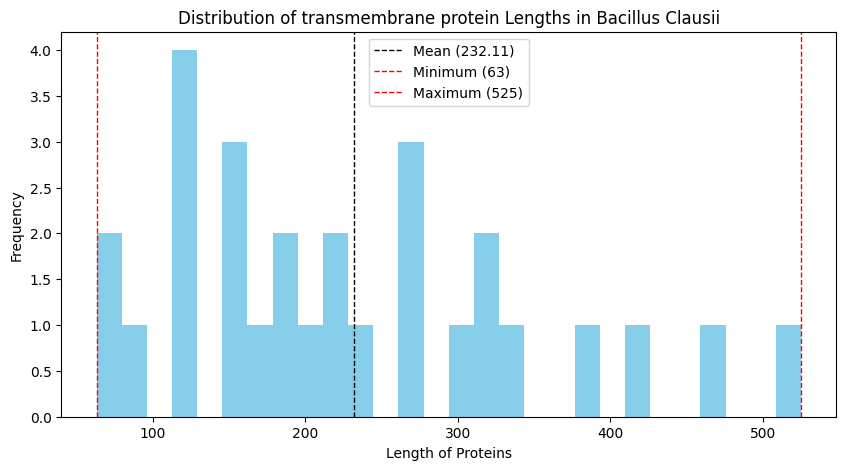

In [282]:
# Analyze the data
# Get the length of the proteins
lengths = df_transmembrane["Length"].values
mean_length = round(mean_length, 2)
minimum_length = round(minimum_length, 2)
maximum_length = round(maximum_length, 2)

# Plot the data
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=28, color="skyblue")
plt.axvline(mean_length, color='k', linestyle='dashed', linewidth=1)
plt.axvline(minimum_length, color='r', linestyle='dashed', linewidth=1)
plt.axvline(maximum_length, color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Length of Proteins")
plt.ylabel("Frequency")
plt.title("Distribution of transmembrane protein Lengths in Bacillus Clausii")
plt.legend(["Mean (" + str(mean_length) + ")", "Minimum (" + str(minimum_length) + ")", "Maximum (" + str(maximum_length) + ")"])

plt.show()


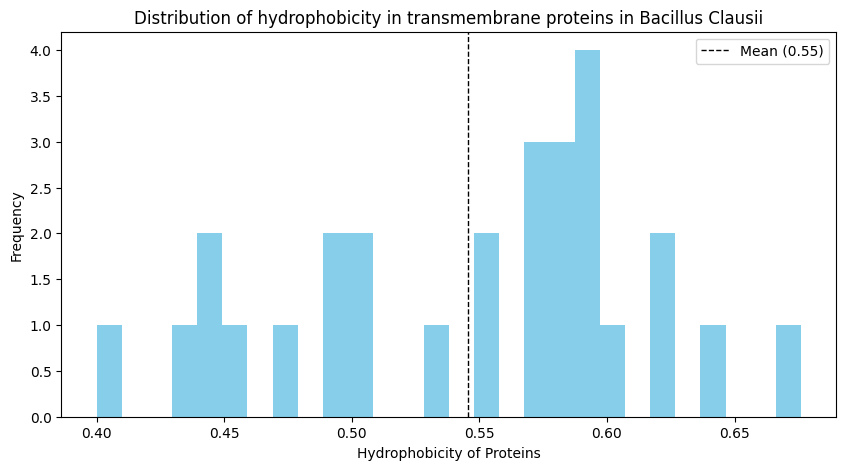

In [294]:
# Analyze the hydrophobicity of the proteins
# Define the hydrophobic amino acids

# Define the hydrophobic amino acids dictionary with single-letter codes
hydrophobic_amino_acids = {
    "A": "Alanine",
    "V": "Valine",
    "F": "Phenylalanine",
    "M": "Methionine",
    "L": "Leucine",
    "P": "Proline",
    "I": "Isoleucine",
    "W": "Tryptophan"
}

# Calculating the distribution of hydrophobic amino acids in the transmembrane proteins
hydrophobocity = []
for  sequence in df_transmembrane["Sequence"]:
    hydrophobic_count = 0
    for amino_acid in sequence:
        if amino_acid in hydrophobic_amino_acids:
            hydrophobic_count += 1
    hydrophobocity.append(hydrophobic_count / len(sequence))

mean_hydrophobicity = np.mean(hydrophobocity)
# Plot the data
plt.figure(figsize=(10, 5))
plt.hist(hydrophobocity, bins=28, color="skyblue")
plt.xlabel("Hydrophobicity of Proteins")
plt.ylabel("Frequency")
plt.axvline(mean_hydrophobicity, color='k', linestyle='dashed', linewidth=1)
plt.legend(["Mean (" + str(round(mean_hydrophobicity, 2)) + ")"])
plt.title("Distribution of hydrophobicity in transmembrane proteins in Bacillus Clausii")

plt.show()



